In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sample_players import *
from isolation import Board
from game_agent import CustomPlayer
from game_agent import custom_score

%matplotlib inline

In [6]:
TIME_LIMIT = 150

In [3]:
def runTrial(player1, player2, game, numTrials=1000):
    wins = 0
    avg_depth = 0

    for i in range(numTrials):
        new_game = game.copy()
        winner, history, outcome = new_game.play(time_limit=TIME_LIMIT)
        if winner == player1:
            wins += 1
        avg_depth += len(history)

    return wins/numTrials, avg_depth/numTrials

In [7]:
width = 7
height = 7
probs = np.empty((width,height))
dpths = np.empty_like(probs)
CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}
player1 = CustomPlayer(score_fn=improved_score, **CUSTOM_ARGS)
player2 = CustomPlayer(score_fn=improved_score, **CUSTOM_ARGS)

for i in range(probs.shape[0]):
    for j in range(probs.shape[1]):
        game = Board(player1, player2, width, height)
        game.apply_move((i,j))
        game.apply_move(player2.get_move(game, game.get_legal_moves(player2), lambda: 200))
        prob, depth = runTrial(player1, player2, game, 1)
        probs[i,j] = prob
        dpths[i,j] = depth


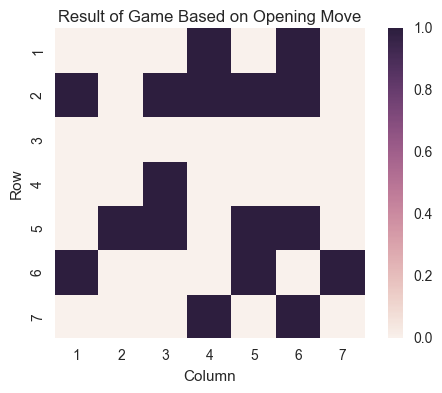

In [15]:
plt.figure()
plt.title("Result of Game Based on Opening Move")
g = sns.heatmap(probs, square=True, xticklabels=range(1,8), yticklabels=range(1,8))
g.set_xlabel('Column')
g.set_ylabel('Row')

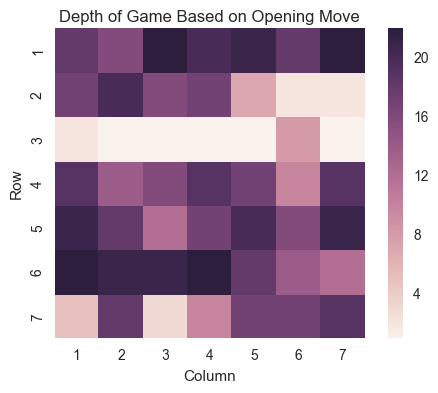

In [16]:
plt.figure()
plt.title("Depth of Game Based on Opening Move")
g = sns.heatmap(dpths, square=True, xticklabels=range(1,8), yticklabels=range(1,8))
g.set_xlabel('Column')
g.set_ylabel('Row')